In [1]:
import numpy as np
import keras
import os
import cv2
from keras.models import load_model
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
letters = { 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j',
11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't',
21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 27: '-'}


In [4]:
model = load_model('Model/cnn_model.h5')
model2 = load_model('Model/cnn_model_2.h5')

[Errno 2] No such file or directory: 'Desktop/minor_project/'
/home/atif/Desktop/minor_project


In [6]:
ls

1-s2.0-S0031320318304370-main.pdf    data/                images/
alphabets/                           emnist_mlp_model.h5  Model/
cnn_model_image_datagenerator.ipynb  extract_roi.py       python-mnist/
cnn_model.ipynb                      holo.py              text_detect.ipynb
color_detect.py                      image_extract.ipynb


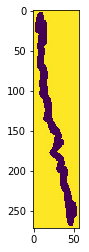

In [7]:
img = cv2.imread('alphabets/3.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
h,w = img.shape
if(h > w):
    image = np.zeros((h,h))
    image = image[:,int((h-w)/2):int(w+(h-w)/2)]+img
else:
    image = np.zeros((w,w))
    image = image[int((w-h)/2):int((w-h)/2+h),:] + img
image = np.array(image)
image = image.astype('float32')/255
plt.imshow(image)

9


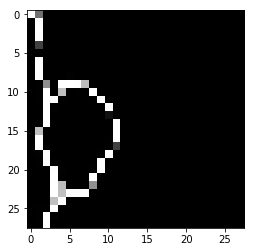

In [106]:
img = cv2.imread('alphabets/2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
h,w = img.shape
img = np.pad(img, pad_width=300, mode='constant', constant_values=255)
if(h>w):
    img = img[300:300+h,300:300+h]
else:
    img = img[500:500+w,500:500+w]
plt.imshow(img,cmap = 'gray')
img = cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)
img = img.astype('float32')/255
plt.imshow(img,cmap = 'gray')
prediction = model.predict(img.reshape(1,28,28,1))
prediction = np.argmax(prediction)
print(prediction)

9


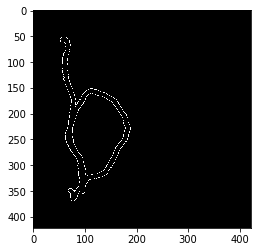

In [186]:
img = cv2.imread('alphabets/2.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)

h,w = img.shape
img = np.pad(img, pad_width=300, mode='constant', constant_values=0)
if(h>w):
    img = img[250:350+h,250:350+h]
else:
    img = img[250:350+h,250:350+h]
wide = cv2.Canny(img, 30, 100)
tight = cv2.Canny(img, 200, 240)
img = cv2.resize(img,(28,28))
img = img.astype('float32')/255
plt.imshow(tight,cmap = 'gray')

prediction = model.predict(img.reshape(1,28,28,1))
prediction = np.argmax(prediction)
print(prediction)

In [9]:
kernel = np.ones((5, 5), np.uint8)

[1.9065218e-06 7.5464904e-08 6.0851018e-09 5.1030389e-07 1.4126769e-06
 1.7901169e-04 1.4874618e-05 8.6997307e-09 1.5649267e-07 3.0178143e-08
 2.7392338e-07 1.9875810e-09 6.6476315e-07 5.6822560e-06 2.6371004e-07
 9.9719149e-01 5.0682112e-05 1.9664920e-04 2.5829368e-09 3.9633182e-06
 1.6646819e-09 1.3626000e-04 6.6100423e-05 8.3039379e-07 2.1490583e-03
 4.8303797e-08]
15
[1.1737184e-06 5.3801013e-12 7.1428779e-13 5.2605836e-13 1.4169734e-07
 3.4508828e-02 7.8905907e-07 4.7908729e-14 1.0528636e-09 2.4781932e-13
 3.9509517e-13 1.4905447e-12 7.9099742e-17 3.2523580e-13 2.4965637e-16
 9.6543133e-01 4.1656563e-06 9.6412423e-06 4.0839948e-17 3.4025317e-05
 8.7959750e-19 9.9112896e-09 1.1249364e-18 1.0592870e-13 8.9416926e-06
 9.9147599e-07]
15
15


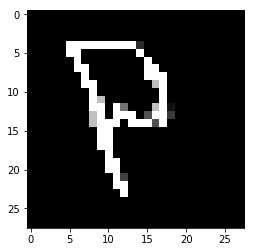

In [280]:
img = cv2.imread('alphabets/4.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)

retval, img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

h,w = img.shape
img = np.pad(img, pad_width=100, mode='constant', constant_values=0)
if(h>w):
    img = img[50:150+h,50:150+h]
else:
    img = img[50:150+w,50:150+w]

img = cv2.dilate(img, kernel, iterations=1)
img = cv2.resize(img,(28,28))
img = img.astype('float32')/255

plt.imshow(img,cmap = 'gray')

prediction = model.predict(img.reshape(1,28,28,1))[0]
print(prediction)
#prediction = np.argmax(prediction)
print(np.argmax(prediction))

prediction2 = model2.predict(img.reshape(1,28,28))[0]
print(prediction2)
#prediction = np.argmax(prediction)
print(np.argmax(prediction2))
prediction3 = prediction+prediction2
prediction3 = np.argmax(prediction3)
print(prediction3)


4


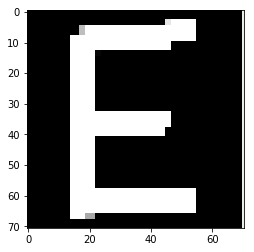

In [268]:
img = cv2.imread('alphabets/label_E.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img = img[80:160,140:230]
img = img[7:78,7:78]
plt.imshow(img,cmap = 'gray')
img = cv2.resize(img,(28,28))
img = img.astype('float32')/255
prediction = model.predict(img.reshape(1,28,28,1))[0]
#prediction = np.argmax(prediction)
prediction2 = model2.predict(img.reshape(1,28,28))[0]
prediction3 = prediction+prediction2
prediction3 = np.argmax(prediction3)
print(prediction3)

netork


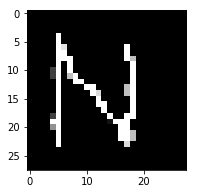

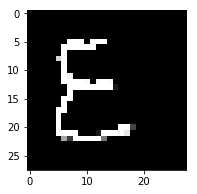

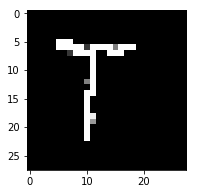

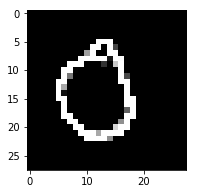

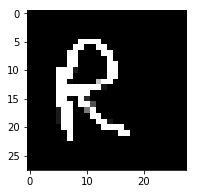

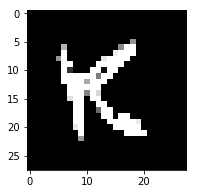

In [36]:
word = ''
for i,item in enumerate(sorted(os.listdir('alphabets/'))):
    plt.figure(figsize=(20,10))
    ax = plt.subplot(1, len(os.listdir('alphabets/')), i+1)
    img = cv2.imread('alphabets/'+item)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.bitwise_not(img)

    retval, img = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)

    h,w = img.shape
    img = np.pad(img, pad_width=100, mode='constant', constant_values=0)
    if(h>w):
        img = img[50:150+h,50:150+h]
    else:
        img = img[50:150+w,50:150+w]

    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.resize(img,(28,28))
    img = img.astype('float32')/255

    ax.imshow(img,cmap = 'gray')

    prediction = model.predict(img.reshape(1,28,28,1))[0]
    prediction = np.argmax(prediction)
    prediction2 = model2.predict(img.reshape(1,28,28,1))[0]
    prediction2 = np.argmax(prediction2)
    prediction3 = prediction+prediction2
    prediction3 = np.argmax(prediction3)
    word+=str(letters[int(prediction)+1])
print(word)